In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

This is the second iteration of Jupyter Notebooks looking at fielding ratings in Out of the Park Baseball XX. This notebook will focus on Catcher Ability, probably the least understood fielding attribute in the game. People would be ridiculed out of the league if they put a player with 35 range at either SS or CF, yet there are players like Zac Collins, Stephen Vogt, and Ian Rice holding roster spots in the league as catchers.

As with everything in this series, measuring the impact one single fielding attribute has on the run environment is tenuous, and there's the inherent variability in baseball. The method of data collection, using the simulation module in game, is also not established as being 1:1 with the game engine that's used to produce results, but it's the best we've got right now.

Setup (If you read this yesterday, skip to the next paragraph):
I've already established I will be using the base MLB league in OOTPXX, and using the Seattle Mariners. Every rating that was used for this was modified from the default for that individual player. For this, I used the simulation module in game to simulate the season 100 times for each combination of ratings, scraping the HTML report after each simulation and saving that as a CSV file. I will primarily be looking at the number of runs allowed by the team in relation to the specific variable being tested, but in some instances when looking at catching data will expand to ERA/K/BB as well.

This experiment uses Tom Murphy as its test subject. Murphy is not a particularly good catcher by any mean, but is respectable behind the plate with a starting Catcher Ability of 55.

For all the boxplots in this, Catcher Ability is shown on the vertical axis, and the statistic being measured is on the horizontal axis.

In the below code block, I load the data from the experiment. Each row in the data corresponds to a different season, with the last column 'RLF' being the range rating on the 1-200 scale for that season.

In [2]:
catcher = pd.read_csv('CatcherAbility.csv')
catcher.head()

,W,L,Runs,AVG,HR,SB,Runs against,ERA,K,BB,CA
0,75,87,749,0.255,177,100,872,4.94,1331,552,140
1,64,98,633,0.242,140,113,821,4.79,1341,536,140
2,77,85,733,0.257,169,89,799,4.59,1303,547,140
3,64,98,653,0.244,149,113,795,4.59,1363,538,140
4,69,93,674,0.248,138,99,793,4.64,1318,548,140


Here are all the corresponding catcher ability ratings on the 20-80 scale that were used. There are some products of rounding evident in this. 

In [3]:
list(5 * np.round(((((catcher.CA.unique() - 1) * (80 - 20)) / (200 - 1)) + 20) / 5, 0))

[60.0, 70.0, 80.0, 40.0, 55.0, 35.0, 45.0, 60.0]

Below is a histogram looking at the distribution of runs the team gave up for both a catcher with an 80 ability, and one who has a 35 catcher ability.

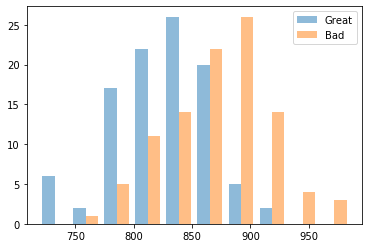

In [4]:
great = catcher.loc[catcher['CA'] == 200, ['Runs against']]
horrible = catcher.loc[catcher['CA'] == 50, ['Runs against']]

plt.hist([great['Runs against']
          , horrible['Runs against']
         ] , alpha=0.5, label=['Great', 'Bad'])

plt.legend(loc='upper right')
plt.show()

A boxplot of all the various range ratings on the vertical axis, and the number of runs allowed on the horizonal axis.

It seems pretty clear that as ability increases, the median number of runs the team gives up decreases.

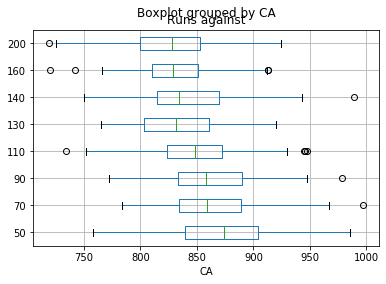

In [5]:
catcher.boxplot('Runs against', by='CA', vert=False)

As with the corner outfield range experiment, I won't be doing much model building and validation. From here on out, assume I've done some rudimentary model validation and viewing diagnostic plots.

The corner outfield range model had a very weak score, and while this model's score is still weak, it is much higher than the previous one.

In [16]:
target = catcher['Runs against']
variable = np.array(catcher['CA']).reshape(-1,1)
lr = linear_model.LinearRegression()
lr.fit(variable, target)
lr.score(variable, target)

0.11701290205720705

For every five point difference in catcher ability, we would expect to see a change in runs allowed of about six over the course of a season.

In [18]:
(((((50 - 20) * (200 - 1)) / (80 - 20)) + 1) - (((45 - 20) * (200 - 1)) / (80 - 20)) + 1) * lr.coef_[0]

-5.940995354972196

The difference between a 65 ability (Buster Posey), and a player with 45 (Francisco Mejia) would be about 22 runs.

In [8]:
(((((65 - 20) * (200 - 1)) / (80 - 20)) + 1) - (((45 - 20) * (200 - 1)) / (80 - 20)) + 1) * lr.coef_[0]

-21.845812516041264

We can look at wins now. As with the runs allowed plot, there seems to be a clear relationship between ability and number of wins the team achieves.

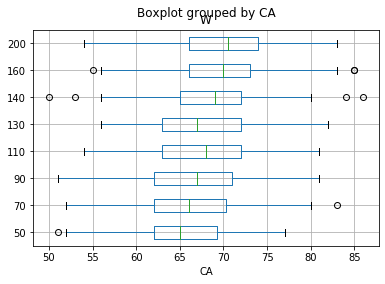

In [9]:
catcher.boxplot('W', by='CA', vert=False)

For every five point difference in ability, there appears to be a difference of .6 wins over the course of a season.

In [10]:
target = catcher['W']
lr = linear_model.LinearRegression()
lr.fit(variable, target)
(((((50 - 20) * (200 - 1)) / (80 - 20)) + 1) - (((45 - 20) * (200 - 1)) / (80 - 20)) + 1) * lr.coef_[0]

0.6197351447751039

Comparing Posey to Mejia again, that's about 2.3 wins on the year.

In [11]:
(((((65 - 20) * (200 - 1)) / (80 - 20)) + 1) - (((45 - 20) * (200 - 1)) / (80 - 20)) + 1) * lr.coef_[0]

2.2788467206976923

Unlike outfield range, it makes sense to look at strikeouts (first plot below) and walks (second), since a catcher would be expected to have some measure of control over those given what we have seen so far.

Again with both, it seems there is a clear relationship between ability and both statistics.

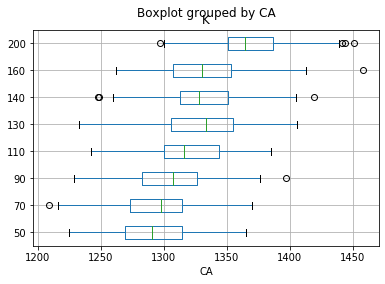

In [12]:
catcher.boxplot('K', by='CA', vert=False)

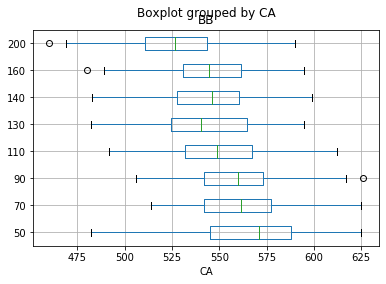

In [13]:
catcher.boxplot('BB', by='CA', vert=False)

For every five point change in ability, the team would be expected to strikeout about 9 more batters, while walking 4.7 fewer. That's about 28 more strikeouts when comparing Mejia and Posey, and 19 fewer walks.

In [14]:
target = catcher['K']
lr = linear_model.LinearRegression()
lr.fit(variable, target)
(((((50 - 20) * (200 - 1)) / (80 - 20)) + 1) - (((45 - 20) * (200 - 1)) / (80 - 20)) + 1) * lr.coef_[0]

9.03827736941398

In [15]:
target = catcher['BB']
lr = linear_model.LinearRegression()
lr.fit(variable, target)
(((((50 - 20) * (200 - 1)) / (80 - 20)) + 1) - (((45 - 20) * (200 - 1)) / (80 - 20)) + 1) * lr.coef_[0]

-4.70117870325535

That concludes this look at catcher ability. I think the results speak for themselves in this situation. I do not think you'll ever see a catcher with an ability lower than 60 on my team in the future. :-)